In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')
df.shape[0]

891

# Remove Col:-['PassengerId','Name','Ticket','Cabin']

In [5]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [6]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Remove Row:-[0,3,8,10]

In [7]:
df.drop([0,3,8,10], axis=0, inplace=True)

In [8]:
df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# Fiil NA Value Of Age & Embarked Col:-

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Apply OneHotEncoder on Embarked Col:-
##because this col are nominal categerical data

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
one=OneHotEncoder()

In [14]:
##Use Sex Col:-
dummies_sex=pd.get_dummies(df['Sex'])
new_sex=dummies_sex.drop(['male'], axis=1).astype(int)
df['Sex']=new_sex
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
4,0,3,0,35.000000,0,0,8.0500,S
5,0,3,0,29.742493,0,0,8.4583,Q
6,0,1,0,54.000000,0,0,51.8625,S


In [15]:
data=np.array([df['Embarked']])
res=one.fit_transform(data)
##print(res)
##print(res.toarray())

In [42]:
dummies_embarked=pd.get_dummies(df['Embarked']).astype(int)

In [43]:
dummies_embarked

,C,Q,S
1,1,0,0
2,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [44]:
new_df=pd.concat([df,dummies_embarked],axis=1, join='inner')

In [50]:
new_df.drop(['Embarked'], axis=1,inplace=True)

In [51]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
5,0,3,0,29.742493,0,0,8.4583,0,1,0
6,0,1,0,54.000000,0,0,51.8625,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,1,29.742493,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


# Use StadardScaler

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaler.fit(new_df)

StandardScaler()

In [55]:
new_df_scaled = scaler.transform(new_df)

In [56]:
scaler.mean_

array([ 0.38218715,  2.30777903,  0.35062007, 29.74249296,  0.52198422,
        0.37993236, 32.25001804,  0.18940248,  0.08680947,  0.72378805])

In [57]:
new_df_scaled

array([[ 1.27142407, -1.56552195,  1.36091515, ...,  2.06875854,
        -0.30832082, -1.61876748],
       [ 1.27142407,  0.82864696,  1.36091515, ..., -0.48338169,
        -0.30832082,  0.61775395],
       [-0.78651964,  0.82864696, -0.73479967, ..., -0.48338169,
        -0.30832082,  0.61775395],
       ...,
       [-0.78651964,  0.82864696,  1.36091515, ..., -0.48338169,
        -0.30832082,  0.61775395],
       [ 1.27142407, -1.56552195, -0.73479967, ...,  2.06875854,
        -0.30832082, -1.61876748],
       [-0.78651964,  0.82864696, -0.73479967, ..., -0.48338169,
         3.24337487, -1.61876748]])

# Numpy Array To Change In DataFrame

In [59]:
new_df_scaled = pd.DataFrame(new_df_scaled, columns=new_df.columns)
new_df_scaled.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1.271424,-1.565522,1.360915,0.635623,0.432939,-0.471898,0.784468,2.068759,-0.308321,-1.618767
1,1.271424,0.828647,1.360915,-0.288079,-0.472761,-0.471898,-0.488870,-0.483382,-0.308321,0.617754
2,-0.786520,0.828647,-0.734800,0.404697,-0.472761,-0.471898,-0.486358,-0.483382,-0.308321,0.617754
3,-0.786520,0.828647,-0.734800,0.000000,-0.472761,-0.471898,-0.478152,-0.483382,3.243375,-1.618767
4,-0.786520,-1.565522,-0.734800,1.867226,-0.472761,-0.471898,0.394160,-0.483382,-0.308321,0.617754


In [64]:
np.round(new_df.describe())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,887.0,887.0,887.0,887.0,887.0,887.0,887.0,887.0,887.0,887.0
mean,0.0,2.0,0.0,30.0,1.0,0.0,32.0,0.0,0.0,1.0
std,0.0,1.0,0.0,13.0,1.0,1.0,50.0,0.0,0.0,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,2.0,0.0,22.0,0.0,0.0,8.0,0.0,0.0,0.0
50%,0.0,3.0,0.0,30.0,0.0,0.0,14.0,0.0,0.0,1.0
75%,1.0,3.0,1.0,35.0,1.0,0.0,31.0,0.0,0.0,1.0
max,1.0,3.0,1.0,80.0,8.0,6.0,512.0,1.0,1.0,1.0


In [65]:
np.round(new_df_scaled.describe())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,887.0,887.0,887.0,887.0,887.0,887.0,887.0,887.0,887.0,887.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-1.0,-2.0,-0.0,-0.0,-1.0,-0.0,-0.0,-2.0
25%,-1.0,-0.0,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-2.0
50%,-1.0,1.0,-1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0
75%,1.0,1.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0
max,1.0,1.0,1.0,4.0,7.0,7.0,10.0,2.0,3.0,1.0


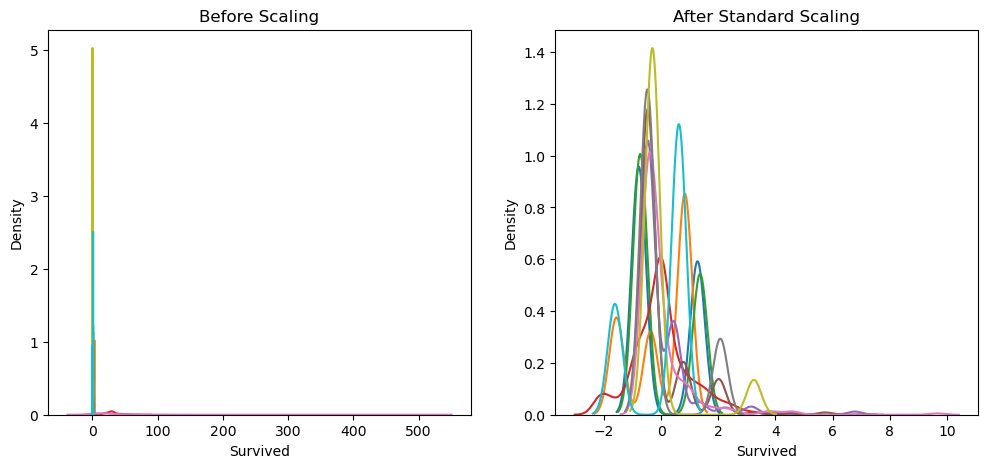

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(new_df['Survived'], ax=ax1)
sns.kdeplot(new_df['Pclass'], ax=ax1)
sns.kdeplot(new_df['Sex'], ax=ax1)
sns.kdeplot(new_df['Age'], ax=ax1)
sns.kdeplot(new_df['SibSp'], ax=ax1)
sns.kdeplot(new_df['Parch'], ax=ax1)
sns.kdeplot(new_df['Fare'], ax=ax1)
sns.kdeplot(new_df['C'], ax=ax1)
sns.kdeplot(new_df['Q'], ax=ax1)
sns.kdeplot(new_df['S'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(new_df_scaled['Survived'], ax=ax2)
sns.kdeplot(new_df_scaled['Pclass'], ax=ax2)
sns.kdeplot(new_df_scaled['Sex'], ax=ax2)
sns.kdeplot(new_df_scaled['Age'], ax=ax2)
sns.kdeplot(new_df_scaled['SibSp'], ax=ax2)
sns.kdeplot(new_df_scaled['Parch'], ax=ax2)
sns.kdeplot(new_df_scaled['Fare'], ax=ax2)
sns.kdeplot(new_df_scaled['C'], ax=ax2)
sns.kdeplot(new_df_scaled['Q'], ax=ax2)
sns.kdeplot(new_df_scaled['S'], ax=ax2)
plt.show()